In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,target
0,0,2013,12,8,17,11.000000,-1144.351458,500.000000,45.000000,6.400000,1067.590514,-10.800000,-6.253469,G,3.700000,A,32.000000
1,1,2013,5,16,7,17.000000,-51.596321,1698.073461,20.458846,19.900000,1016.200000,2.947184,0.000000,A,1.000000,I,89.000000
2,2,2014,6,26,7,-12.059049,45.000000,900.000000,31.000000,24.600000,997.900000,22.300000,0.000000,G,-2.990469,A,154.592918
3,3,2016,5,14,7,2.000000,21.000000,300.000000,25.723403,12.600000,NaN,9.800000,0.700000,C,1.045986,B,24.000000
4,4,2016,10,2,11,2.000000,46.861528,1884.153559,42.000000,6.003678,1010.000000,158.531366,0.000000,E,1.800000,L,196.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306863,306863,2015,4,11,5,17.000000,66.000000,2674.314692,27.000000,12.700000,1010.800000,116.883148,0.000000,E,0.500000,F,211.039870
306864,306864,2016,1,3,2,23.000000,67.440307,5500.000000,2.000000,-3.200000,1011.900000,-7.000000,0.000000,G,1.200000,C,392.000000
306865,306865,2017,1,11,9,12.000000,66.000000,2695.833408,6.000000,9.703111,1016.000000,-147.811549,0.176683,H,1.553953,F,245.835549
306866,306866,2016,12,5,6,9.000000,63.000000,2049.430777,4.665397,2.800000,1014.700000,-7.690267,0.000000,B,2.100000,B,158.000000


In [ ]:
df.isnull().sum()

ID           0
var1         0
var2         0
var3         0
var4         0
var5      2960
var6      1543
var7      1721
var8      1278
var9      1357
var10     1386
var11     2515
var12     2313
var13     1131
var14     2640
var15        0
target     735
dtype: int64

In [ ]:
df = df.dropna(subset= ["target","var13"])
df = df.dropna(thresh = 8 )
df.isnull().sum()

ID           0
var1         0
var2         0
var3         0
var4         0
var5      2944
var6      1536
var7      1707
var8      1271
var9      1349
var10     1375
var11     2496
var12     2297
var13        0
var14     2628
var15        0
target       0
dtype: int64

In [ ]:
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()

ID        0
var1      0
var2      0
var3      0
var4      0
var5      0
var6      0
var7      0
var8      0
var9      0
var10     0
var11     0
var12     0
var13     0
var14     0
var15     0
target    0
dtype: int64

In [ ]:
print(df["var13"].unique())
print(df["var15"].unique())

['G' 'A' 'C' 'E' 'F' 'D' 'B' 'N' 'K' 'I' 'M' 'P' 'O' 'H' 'J' 'L']
['A' 'I' 'B' 'L' 'K' 'D' 'H' 'J' 'E' 'G' 'F' 'C']


In [ ]:

for index, value in df["var13"].items():
    df.at[index, "var13"] = ord(value)

for index, value in df["var15"].items():
    df.at[index, "var15"] = ord(value)

df

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,target
0,0,2013,12,8,17,11.000000,-1144.351458,500.000000,45.000000,6.400000,1067.590514,-10.800000,-6.253469,71,3.700000,65,32.000000
1,1,2013,5,16,7,17.000000,-51.596321,1698.073461,20.458846,19.900000,1016.200000,2.947184,0.000000,65,1.000000,73,89.000000
2,2,2014,6,26,7,-12.059049,45.000000,900.000000,31.000000,24.600000,997.900000,22.300000,0.000000,71,-2.990469,65,154.592918
3,3,2016,5,14,7,2.000000,21.000000,300.000000,25.723403,12.600000,1011.333658,9.800000,0.700000,67,1.045986,66,24.000000
4,4,2016,10,2,11,2.000000,46.861528,1884.153559,42.000000,6.003678,1010.000000,158.531366,0.000000,69,1.800000,76,196.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306863,306863,2015,4,11,5,17.000000,66.000000,2674.314692,27.000000,12.700000,1010.800000,116.883148,0.000000,69,0.500000,70,211.039870
306864,306864,2016,1,3,2,23.000000,67.440307,5500.000000,2.000000,-3.200000,1011.900000,-7.000000,0.000000,71,1.200000,67,392.000000
306865,306865,2017,1,11,9,12.000000,66.000000,2695.833408,6.000000,9.703111,1016.000000,-147.811549,0.176683,72,1.553953,70,245.835549
306866,306866,2016,12,5,6,9.000000,63.000000,2049.430777,4.665397,2.800000,1014.700000,-7.690267,0.000000,66,2.100000,66,158.000000


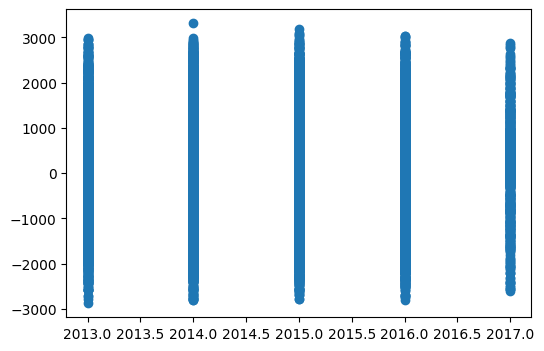

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["var1"], df["target"])

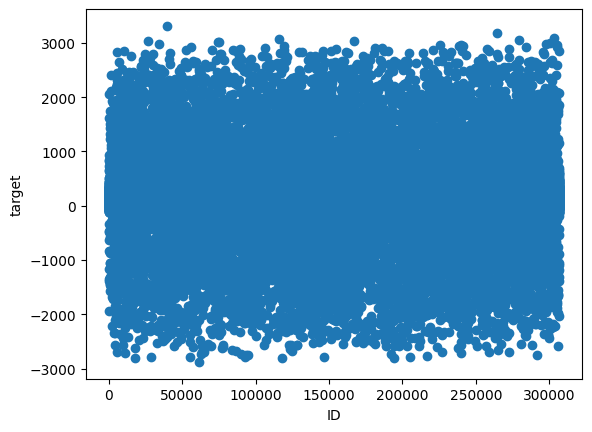

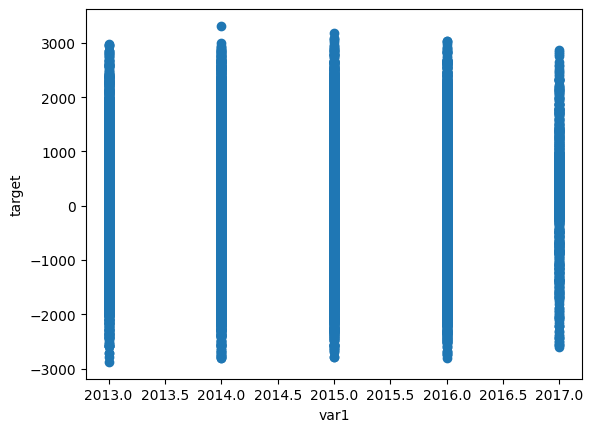

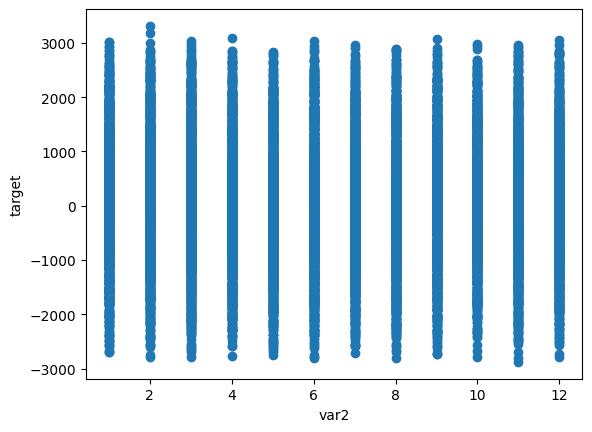

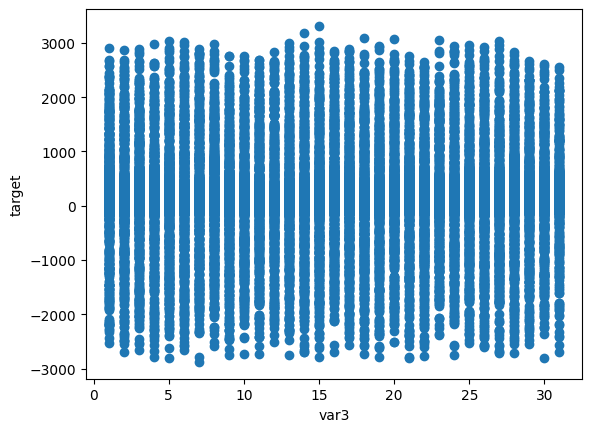

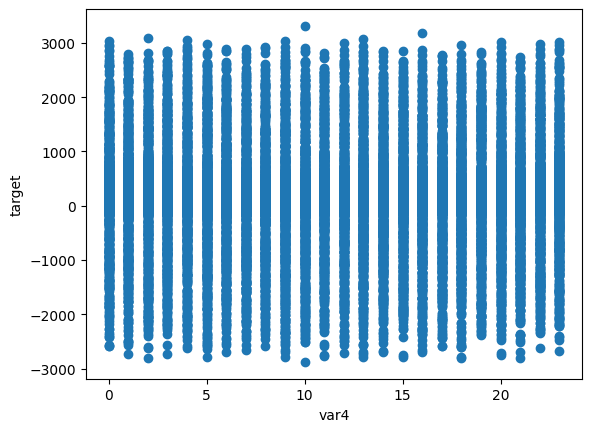

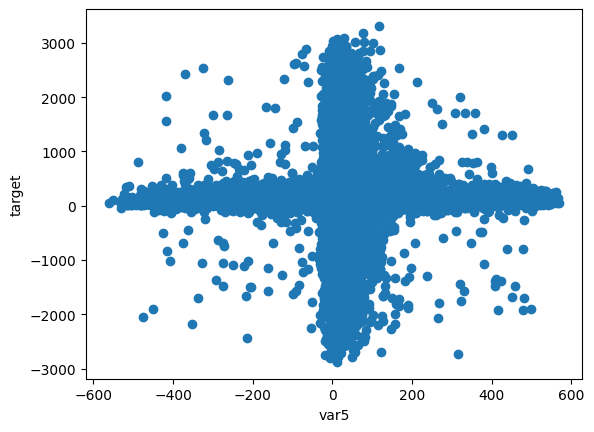

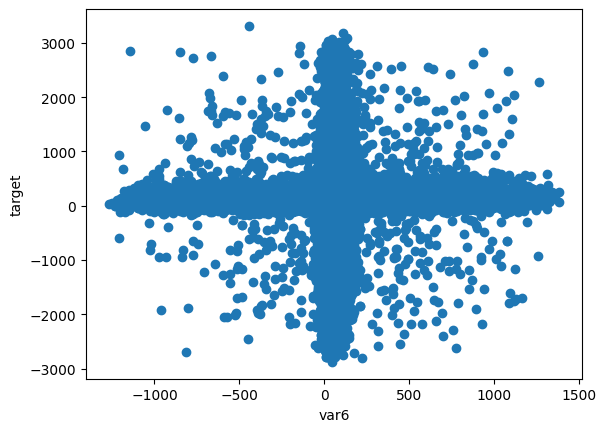

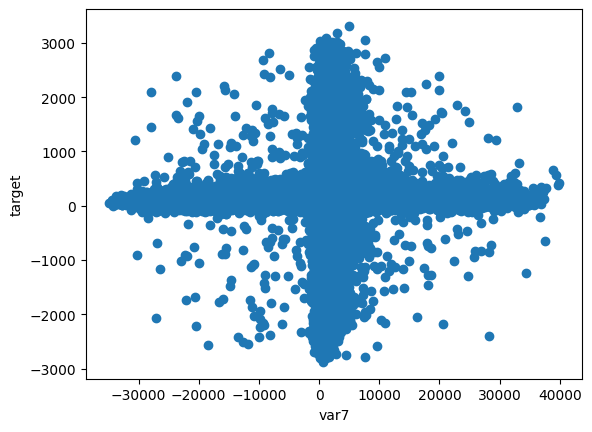

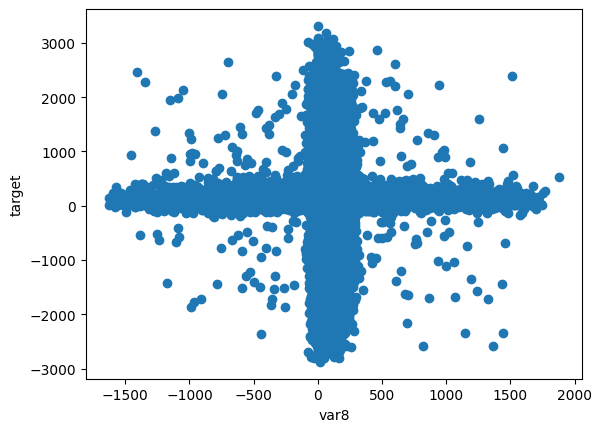

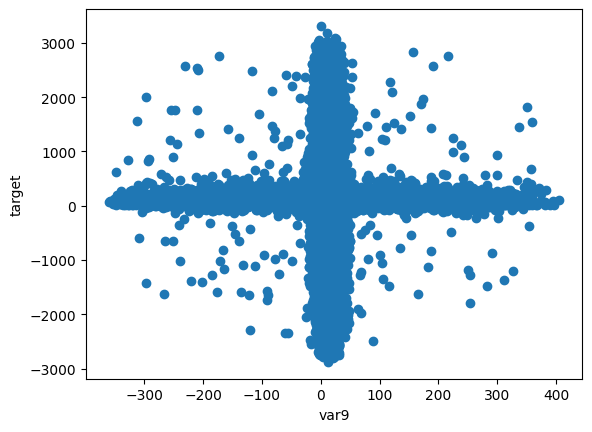

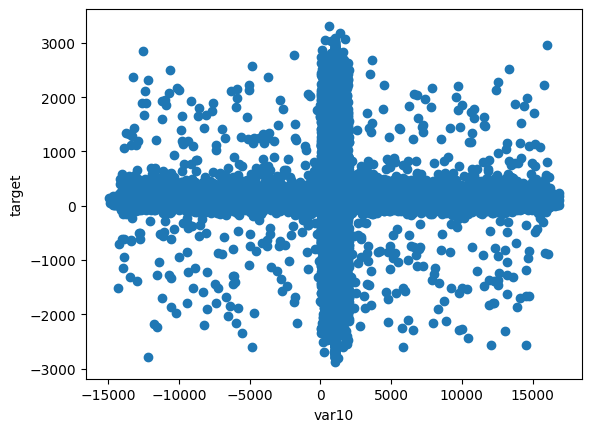

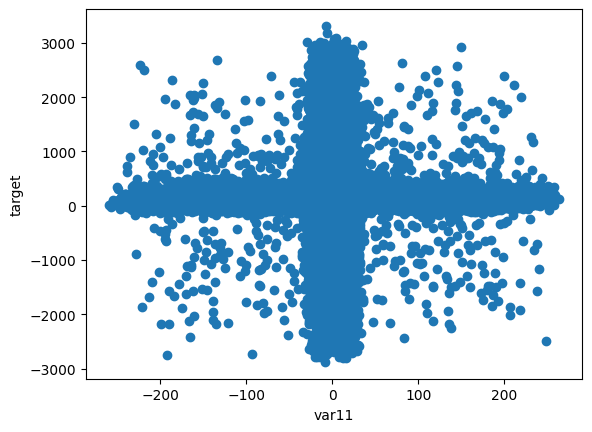

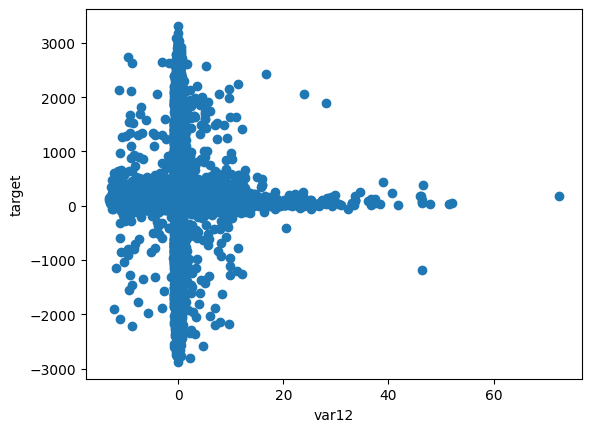

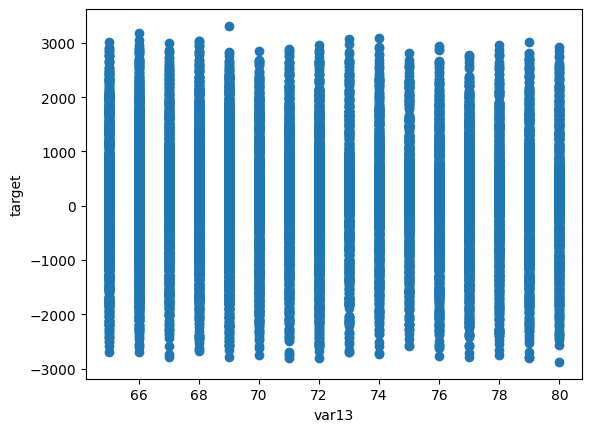

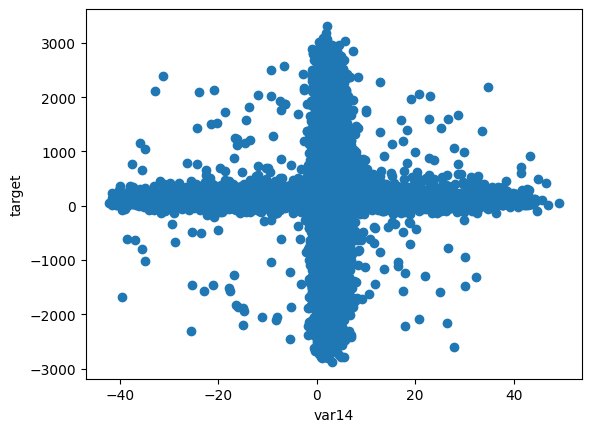

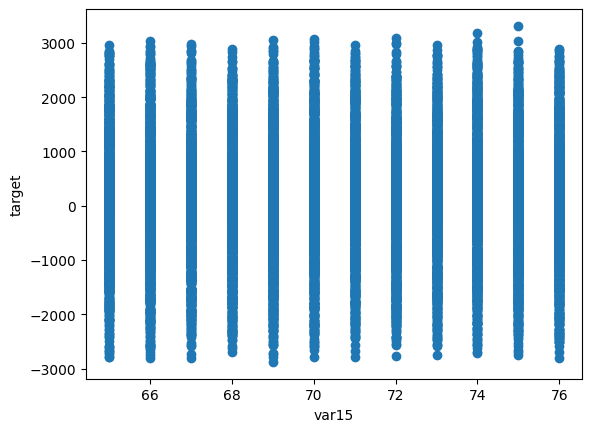

In [ ]:
target_column = "target"
for column in df.columns :
  if column != target_column :
    plt.figure()
    plt.scatter(df[column],df["target"])
    plt.xlabel(column)
    plt.ylabel(target_column)
plt.show()


we see that many variables have not predictive tendency on target variable so we drop them

In [ ]:
columns_to_drop = ["ID", "var1", "var2","var3","var4","var13","var15"]
df = df.drop(columns = columns_to_drop)

In [ ]:
df

,var5,var6,var7,var8,var9,var10,var11,var12,var14,target
0,11.000000,-1144.351458,500.000000,45.000000,6.400000,1067.590514,-10.800000,-6.253469,3.700000,32.000000
1,17.000000,-51.596321,1698.073461,20.458846,19.900000,1016.200000,2.947184,0.000000,1.000000,89.000000
2,-12.059049,45.000000,900.000000,31.000000,24.600000,997.900000,22.300000,0.000000,-2.990469,154.592918
3,2.000000,21.000000,300.000000,25.723403,12.600000,1011.333658,9.800000,0.700000,1.045986,24.000000
4,2.000000,46.861528,1884.153559,42.000000,6.003678,1010.000000,158.531366,0.000000,1.800000,196.000000
...,...,...,...,...,...,...,...,...,...,...
306863,17.000000,66.000000,2674.314692,27.000000,12.700000,1010.800000,116.883148,0.000000,0.500000,211.039870
306864,23.000000,67.440307,5500.000000,2.000000,-3.200000,1011.900000,-7.000000,0.000000,1.200000,392.000000
306865,12.000000,66.000000,2695.833408,6.000000,9.703111,1016.000000,-147.811549,0.176683,1.553953,245.835549
306866,9.000000,63.000000,2049.430777,4.665397,2.800000,1014.700000,-7.690267,0.000000,2.100000,158.000000


#Preparing Test Dataset


In [ ]:

df2 = pd.read_csv("test.csv")
df2

,ID,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15
0,0,2014,2,12,11,23.0,50.0,1300.0,9.0,2.4,1027.6,-15.2,0.0,C,2.4,E
1,1,2014,7,29,23,2.0,16.0,800.0,155.0,23.4,999.5,22.2,6.7,I,0.0,H
2,2,2013,4,18,11,3.0,10.0,300.0,91.0,12.6,1016.0,-15.2,0.0,E,2.1,F
3,3,2014,1,27,9,81.0,98.0,3100.0,1.0,-1.4,1011.7,-7.7,0.0,E,2.0,K
4,4,2016,6,29,16,2.0,20.0,800.0,176.0,28.4,999.4,19.9,0.0,P,2.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76712,76712,2014,1,23,18,139.0,136.0,3400.0,1.0,-1.9,1008.9,-10.2,0.0,E,0.9,A
76713,76713,2013,5,14,9,8.0,22.0,300.0,80.0,25.8,1001.3,1.1,0.0,E,2.0,F
76714,76714,2014,6,19,6,2.0,65.0,700.0,25.0,23.5,995.7,13.4,0.0,D,0.6,B
76715,76715,2017,1,1,6,9.0,104.0,7200.0,3.0,-4.5,1021.5,-5.5,0.0,B,1.2,A


In [ ]:
print(df2["var13"].unique())
print(df2["var15"].unique())
print(df2.columns)

['C' 'I' 'E' 'P' 'M' 'A' 'G' 'F' 'K' 'B' 'J' 'D' nan 'H' 'O' 'L' 'N']
['E' 'H' 'F' 'K' 'D' 'B' 'A' 'L' 'C' 'G' 'I' 'J']
Index(['ID', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15'],
      dtype='object')


In [ ]:

# df2.dropna(inplace=True)

df2.drop('ID',axis = 1,inplace=True)
df2.isnull().sum()

# for index, value in df2["var13"].items():
#     df2.at[index, "var13"] = ord(value)

# for index, value in df2["var15"].items():
#     df2.at[index, "var15"] = ord(value)

# df

var1       0
var2       0
var3       0
var4       0
var5       0
var6       0
var7       0
var8       0
var9       0
var10      0
var11      0
var12      0
var13    286
var14      0
var15      0
dtype: int64

In [ ]:
# Loop through the "var13" column
for index, value in df2["var13"].items():
    if pd.isna(value):
      continue
    else:
      df2.at[index, "var13"] = ord(value)


# Loop through the "var15" column
for index, value in df2["var15"].items():
      df2.at[index, "var15"] = ord(value)


In [ ]:
for index, value in df2["var13"].items():
    if pd.isna(value):
      df2.at[index, "var13"] = df2["var13"].mean()

In [ ]:
df2.isnull().sum()

var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
var9     0
var10    0
var11    0
var12    0
var13    0
var14    0
var15    0
dtype: int64

In [ ]:
columns_to_drop = [ "var1", "var2","var3","var4","var13","var15"]
df2 = df2.drop(columns = columns_to_drop)
df2

,var5,var6,var7,var8,var9,var10,var11,var12,var14
0,23.0,50.0,1300.0,9.0,2.4,1027.6,-15.2,0.0,2.4
1,2.0,16.0,800.0,155.0,23.4,999.5,22.2,6.7,0.0
2,3.0,10.0,300.0,91.0,12.6,1016.0,-15.2,0.0,2.1
3,81.0,98.0,3100.0,1.0,-1.4,1011.7,-7.7,0.0,2.0
4,2.0,20.0,800.0,176.0,28.4,999.4,19.9,0.0,2.0
...,...,...,...,...,...,...,...,...,...
76712,139.0,136.0,3400.0,1.0,-1.9,1008.9,-10.2,0.0,0.9
76713,8.0,22.0,300.0,80.0,25.8,1001.3,1.1,0.0,2.0
76714,2.0,65.0,700.0,25.0,23.5,995.7,13.4,0.0,0.6
76715,9.0,104.0,7200.0,3.0,-4.5,1021.5,-5.5,0.0,1.2


Scaling Features using Z-score

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ["target"])
y = df["target"]

scaler = StandardScaler()

# Fit the scaler on the feature data and transform the features
scaler.fit(X)

X_scaled = scaler.transform(X,copy=False)

X_test_scaled = scaler.transform(df2,copy=False)

X_scaled = pd.DataFrame(X_scaled)

X_test_scaled = pd.DataFrame(X_test_scaled)
print(X_scaled)
print("\n")
print(X_test_scaled)

               0         1         2         3         4             5  \
0      -0.109708 -8.719035 -0.225031 -0.097800 -0.280311  2.791111e-02   
1       0.029773 -0.745631  0.144556 -0.293693  0.255320  2.414372e-03   
2      -0.645760 -0.040806 -0.101638 -0.209551  0.441799 -6.664935e-03   
3      -0.318931 -0.215925 -0.286728 -0.251670 -0.034318 -1.692127e-16   
4      -0.318931 -0.027223  0.201958 -0.121747 -0.296036 -6.616773e-04   
...          ...       ...       ...       ...       ...           ...   
304999  0.029773  0.112423  0.445711 -0.241480 -0.030350 -2.647677e-04   
305000  0.169255  0.122932  1.317390 -0.441037 -0.661204  2.809830e-04   
305001 -0.086461  0.112423  0.452349 -0.409108 -0.149256  2.315145e-03   
305002 -0.156202  0.090533  0.252944 -0.419761 -0.423146  1.670167e-03   
305003 -0.295684 -0.201331 -0.101638  0.850729  0.445766 -2.048234e-01   

               6         7         8  
0      -0.400372 -4.987466  0.668007  
1       0.015148 -0.050388 -0.247

In [ ]:
print(y)

0          32.000000
1          89.000000
2         154.592918
3          24.000000
4         196.000000
             ...    
306863    211.039870
306864    392.000000
306865    245.835549
306866    158.000000
306867     91.000000
Name: target, Length: 305004, dtype: float64


Performing train test split

In [ ]:
df2

,var5,var6,var7,var8,var9,var10,var11,var12,var14
0,0.169255,-0.004323,0.021756,-0.385161,-0.439017,0.008070,-0.533366,-0.050388,0.227185
1,-0.318931,-0.252408,-0.132486,0.780248,0.394187,-0.005871,0.597081,5.239225,-0.586640
2,-0.295684,-0.296187,-0.286728,0.269384,-0.034318,0.002315,-0.533366,-0.050388,0.125457
3,1.517577,0.345914,0.577028,-0.449019,-0.589787,0.000182,-0.306672,-0.050388,0.091547
4,-0.318931,-0.223221,-0.132486,0.947875,0.592569,-0.005921,0.527562,-0.050388,0.091547
...,...,...,...,...,...,...,...,...,...
76712,2.865898,0.623185,0.669573,-0.449019,-0.609625,-0.001207,-0.382237,-0.050388,-0.281456
76713,-0.179449,-0.208628,-0.286728,0.181579,0.489410,-0.004978,-0.040684,-0.050388,0.091547
76714,-0.318931,0.105126,-0.163334,-0.257445,0.398155,-0.007756,0.331094,-0.050388,-0.383184
76715,-0.156202,0.389694,1.841814,-0.433054,-0.712784,0.005044,-0.240175,-0.050388,-0.179728


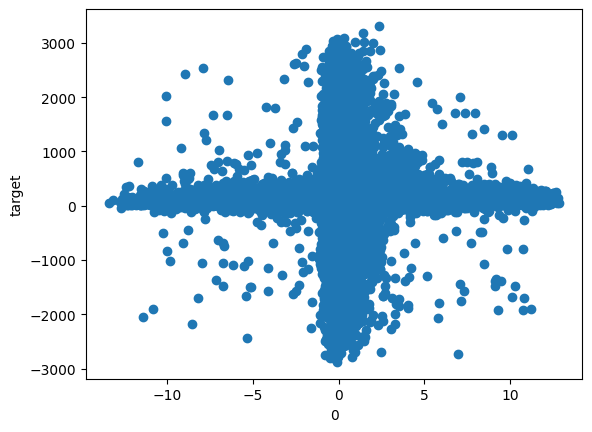

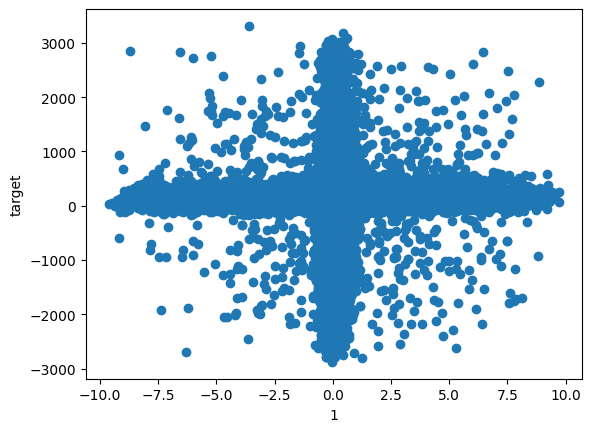

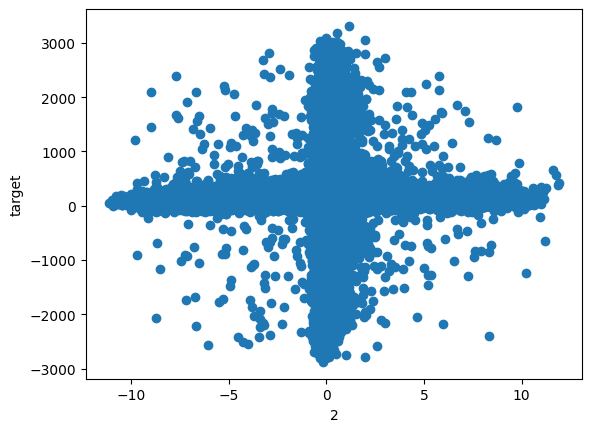

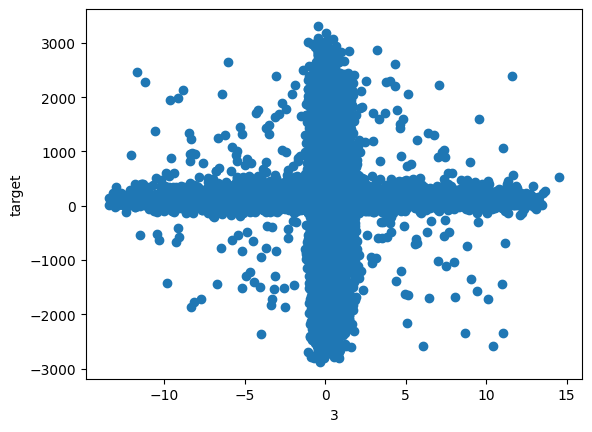

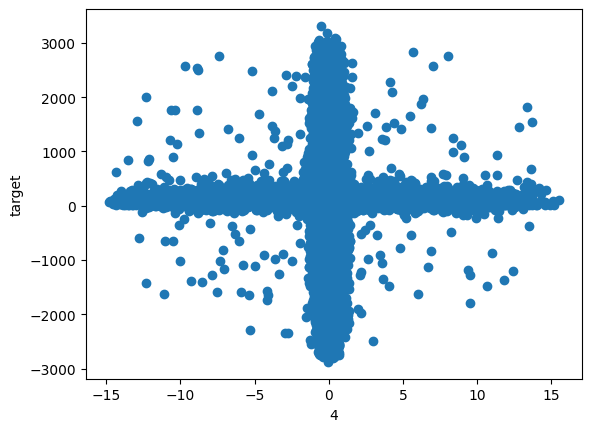

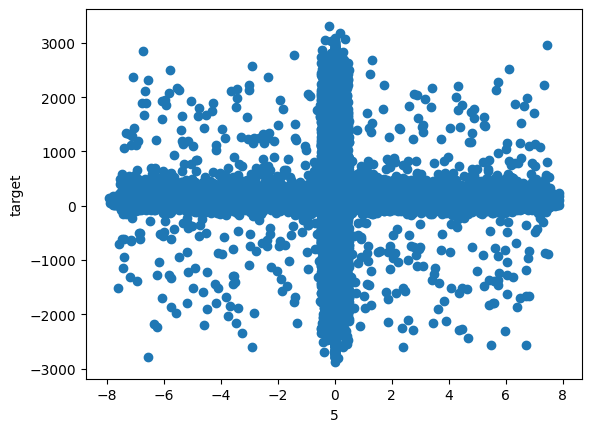

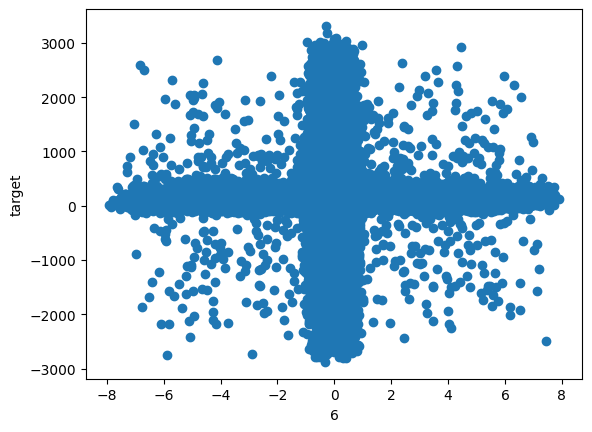

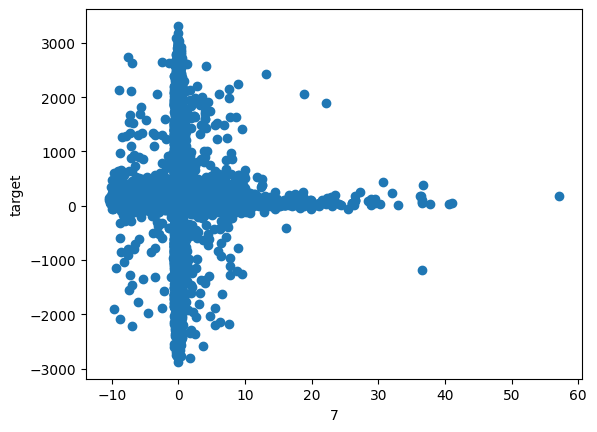

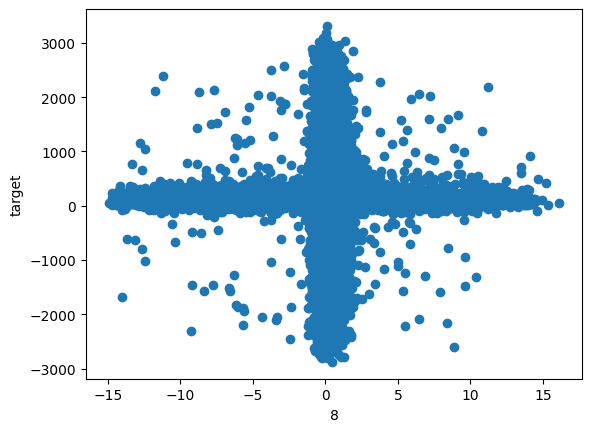

In [ ]:
for column in X_scaled.columns :
    plt.figure()
    plt.scatter(X_scaled[column],y)
    plt.xlabel(column)
    plt.ylabel("target")
plt.show()

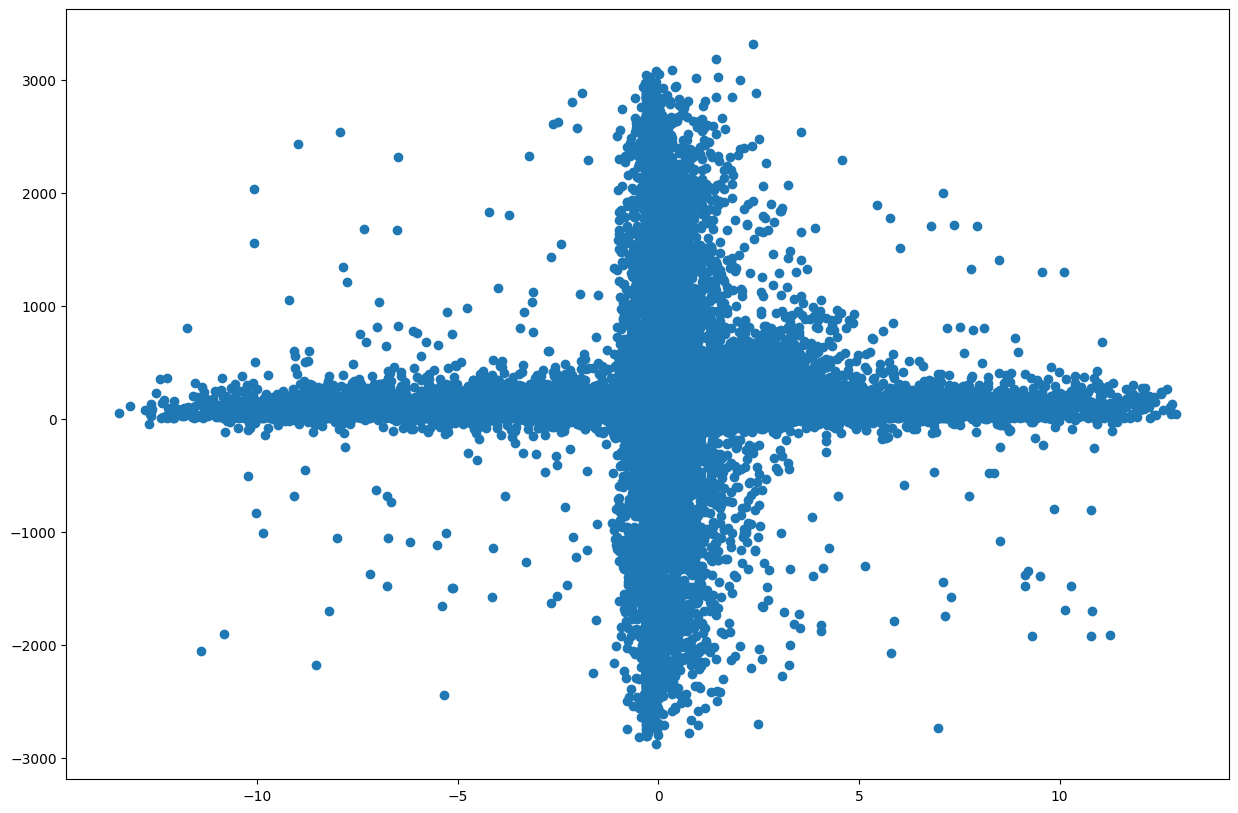

In [ ]:
plt.figure(figsize= (15,10))
plt.scatter(X_scaled[0],y)

In [ ]:
X_new = []
y_new = []
for index,value in X_scaled[0].items():
  if value < 0.1 and value >-0.1 :
    X_new.append(value)
    y_new.append(y.iloc[index])
print(X_new[:5])
print(y_new[:5])

[0.029773166304339096, 0.029773166304339096, -0.039967617891973777, -0.0632145459574114, -0.0632145459574114]
[89.0, -1944.099328441039, 58.0, 445.0, 20.0]


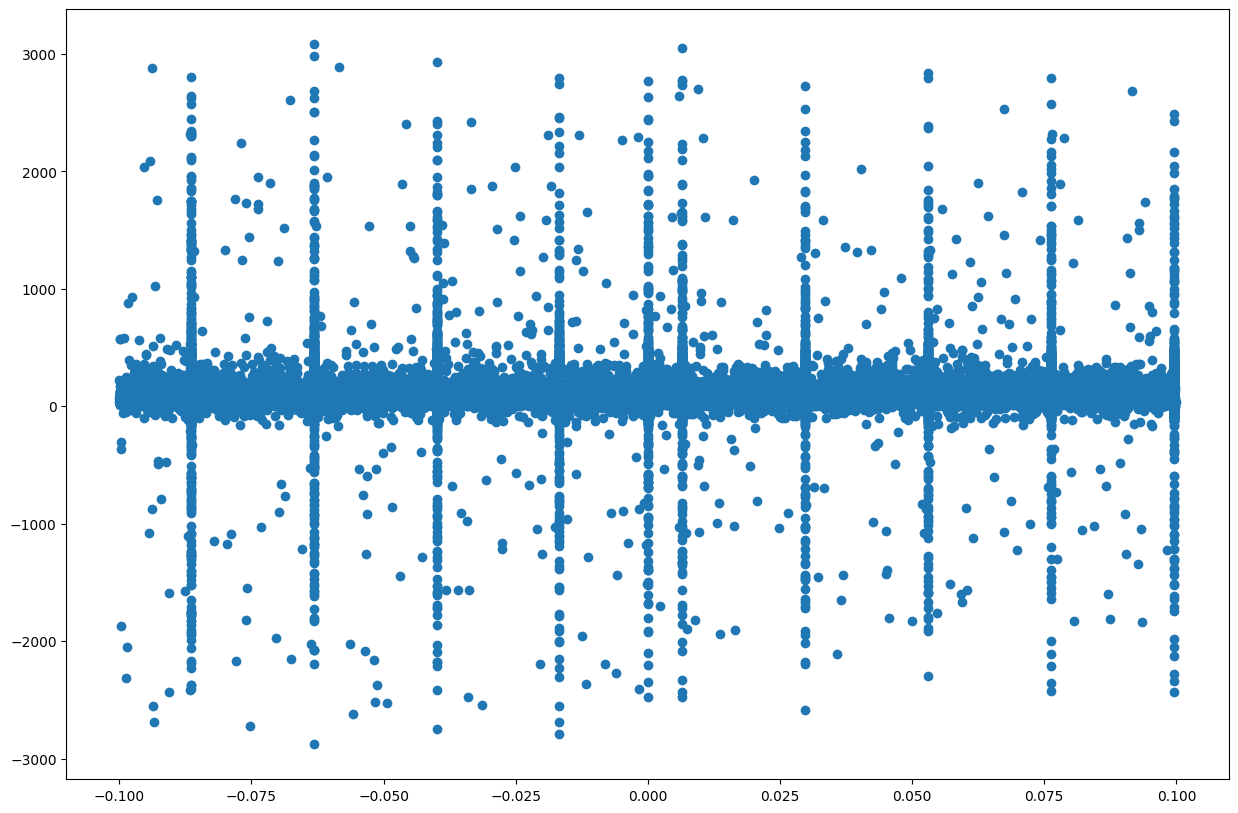

In [ ]:
plt.figure(figsize= (15,10))
plt.scatter(X_new,y_new)

In [ ]:
X_1 = []
y_1 = []
for index in range(len(y_new)):
  if -200 <y_new[index] <200 :
    X_1.append(X_new[index])
    y_1.append(y_new[index])

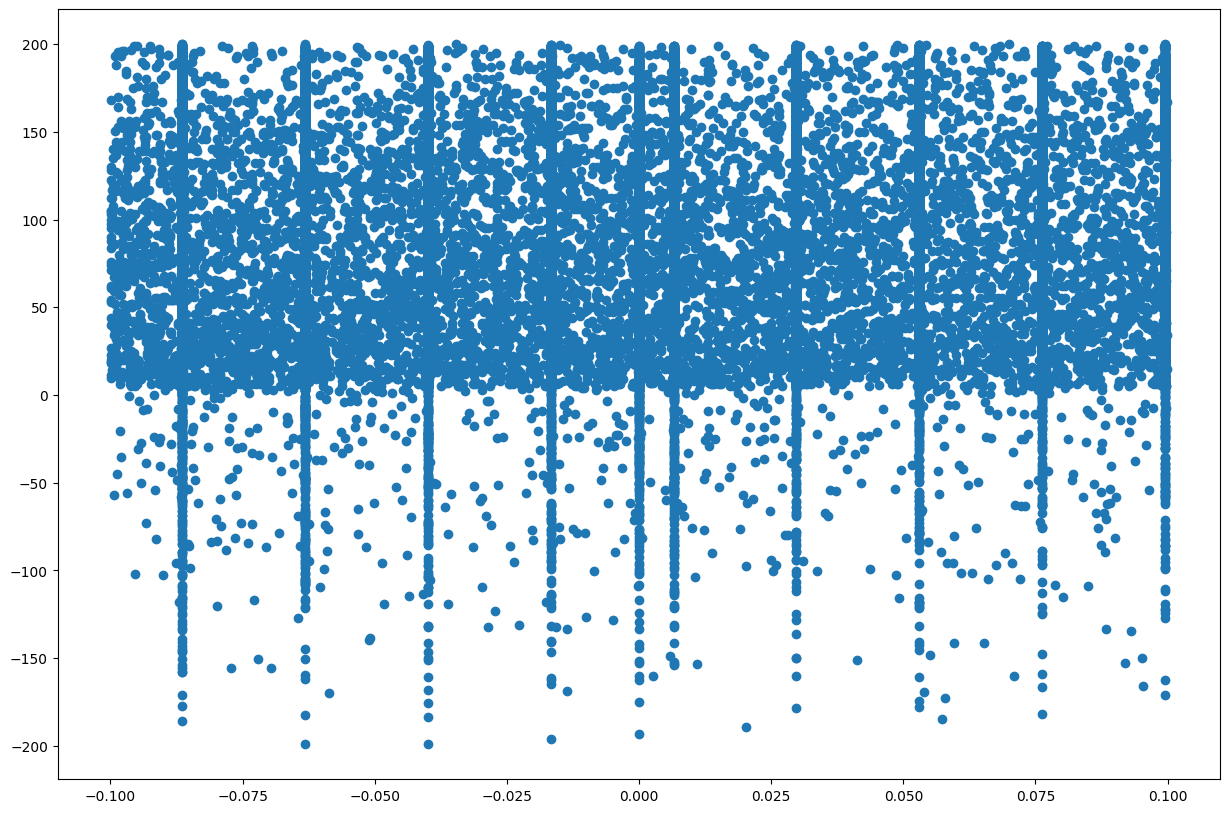

In [ ]:
plt.figure(figsize= (15,10))

plt.scatter(X_1,y_1)

In [ ]:
y.describe()

count    305004.000000
mean        104.993451
std         255.234877
min       -2878.376350
25%          33.000000
50%          84.000000
75%         155.051865
max        3314.344132
Name: target, dtype: float64

In [ ]:
percentile_90 = np.percentile(y, 90)
print(percentile_90)

244.09578790895407


which implies for 90 percent of data points target variable is under the value of 250. So I will try to zoom the data in this range

In [ ]:
corelation_matrix = X_scaled.corr()
print(corelation_matrix)

          0         1         2         3         4         5         6  \
0  1.000000  0.063406  0.091119 -0.040687 -0.071534 -0.000155 -0.052086   
1  0.063406  1.000000  0.065707 -0.055662 -0.030902  0.000081 -0.001116   
2  0.091119  0.065707  1.000000 -0.052070 -0.051583 -0.000292 -0.008129   
3 -0.040687 -0.055662 -0.052070  1.000000  0.121087 -0.001599  0.056725   
4 -0.071534 -0.030902 -0.051583  0.121087  1.000000 -0.000906  0.153836   
5 -0.000155  0.000081 -0.000292 -0.001599 -0.000906  1.000000 -0.002364   
6 -0.052086 -0.001116 -0.008129  0.056725  0.153836 -0.002364  1.000000   
7 -0.012793 -0.009269 -0.000944  0.005071  0.010042  0.000197  0.021633   
8 -0.023950 -0.046266 -0.046457  0.057245  0.005842  0.003281 -0.052916   

          7         8  
0 -0.012793 -0.023950  
1 -0.009269 -0.046266  
2 -0.000944 -0.046457  
3  0.005071  0.057245  
4  0.010042  0.005842  
5  0.000197  0.003281  
6  0.021633 -0.052916  
7  1.000000  0.003842  
8  0.003842  1.000000  


In [ ]:
type(X_scaled
     )

pandas.core.frame.DataFrame

In [ ]:
a = np.array
print(type(a))

<class 'builtin_function_or_method'>


In [ ]:
print(X_scaled.iloc[13342])
print(y.iloc[13342])

0    11.888268
1     1.808389
2    -0.039941
3    -0.048395
4    -0.149379
5     0.002266
6     0.016745
7    -0.050388
8    -0.077999
Name: 13342, dtype: float64
107.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
print(X_train.head(5))
print(y_train.head(5))
print(X_test.head(5))
print(y_test.head(5))

               0         1         2         3         4             5  \
92991  -0.349096  0.440770  0.021756 -0.441037 -0.038285  1.620553e-03   
226248 -0.318931 -0.150255 -0.039941 -0.033899  0.394187 -5.771889e-03   
37345  -0.376401  0.083236  0.145150 -3.022266  0.624310 -1.692127e-16   
213693  0.419667  0.179705 -3.511800 -0.706287  0.425928 -6.863390e-03   
149843  0.122761  0.747227  1.625875 -0.409108 -0.497840 -6.648305e+00   

               6             7         8  
92991   0.167874 -6.491868e-01 -1.085683  
226248  0.624285  2.856165e-02 -0.247546  
37345   0.409681 -5.038779e-02 -0.111909  
213693  0.365572  3.089366e-01 -0.373200  
149843 -0.149497 -1.095644e-17 -0.213637  
93551     180.000000
227614     42.000000
37566     151.000000
214991     40.000000
150760    492.641281
Name: target, dtype: float64
               0         1         2         3         4         5         6  \
179221 -0.408556 -0.223221 -0.286728 -0.065871 -0.613593  0.004349 -0.434255   
206

In [ ]:
print(X_scaled.iloc[133342])
print(y.iloc[133342])

0   -1.174107
1   -0.186738
2   -0.163334
3    0.652532
4    0.425928
5   -0.007360
6    0.545697
7   -0.050388
8   -0.417093
Name: 133342, dtype: float64
73.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_val.head(10))
print(y_val.head(10))

               0         1         2         3         4         5         6  \
143005 -0.272437 -0.223221 -0.348425  0.165614  0.652132 -0.007608  0.200938   
302030 -0.109708 -0.048103 -0.101638 -0.145693 -0.093832  0.000777 -0.244199   
38991   0.009938  0.229168  0.330241 -0.441037 -0.716751  0.007773  0.044317   
19375   0.517959  0.718041  0.916361 -0.433054 -0.193675  0.000876 -0.264356   
264539 -0.092545 -0.385417 -0.194183 -0.441037  0.013294  0.006284 -0.096120   
192304 -0.318931 -0.002081 -0.194183  0.390615  0.207927 -0.037980  0.500359   
83676  -0.249190  0.163330 -0.255880 -0.226847 -0.577425  5.523466 -0.439666   
220728 -0.975758 -0.575386 -0.317577  0.341224 -0.200958 -0.000761 -0.605908   
102596 -0.295684 -0.186738 -0.286728  0.418490  0.421961 -0.002547 -0.258311   
76394  -0.295684 -0.354382 -0.348425 -0.065871 -0.054156  0.415411 -0.267378   

                   7         8  
143005 -5.038779e-02 -0.274202  
302030 -1.095644e-17 -0.244383  
38991  -5.038779e-02

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#x = df[['var1', 'var2', 'var3', 'var4', 'var5','var6','var7','var8','var9','var10','var11','var12','var13','var14','var15']]  # Replace with your feature columns
#y = df['target']
model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions on the test data
y_pred = model.predict(X_val)
print(type(y_pred))

<class 'numpy.ndarray'>


In [ ]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mse)
print(r2)

64438.32705382725
0.01636082728702637


In [ ]:
n = len(y_pred)
ID_arr = np.arange(0,n)
pred_data = {
    'ID':ID_arr,
    'target': y_pred
}
df_pred= pd.DataFrame(pred_data)
df_pred.to_csv('output.csv', index=False)

In [ ]:
df3 = pd.read_csv("output.csv")
df3

,ID,target
0,0,91.071957
1,1,101.241527
2,2,117.383422
3,3,142.837432
4,4,92.015256
...,...,...
48796,48796,101.811402
48797,48797,136.478245
48798,48798,37.059320
48799,48799,98.893038
